# Project: Investigation of the No-show Appointments Dataset 
![no-show](./image/no-show.jpg)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The **no-show appointments [dataset](https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv)** contains information on over one hundred thousand scheduled medical appointments in Brazil. The dataset has 14 variables made up of 13 independent variables and 1 dependent variable indicating whether the patient showed up for their appointment or not. 

The table below shows the various columns in the dataset and their descriptions.


|No. |Column Name |Description|
|-----|-----|-----|
|1. |`PatientId` |Unique identifier of a patient.|
|2. |`AppointmentID`|Unique identifier of the appointment.|
|3. |`Gender` |Gender of the patient.|
|4. |`ScheduledDay` |The day when the patient set up their appointment for i.e: The day that they were to visit the doctor.|
|5. |`AppointmentDay` |The day of the actuall appointment, i.e: The day the patient visits the doctor.|
|6. |`Age` |Age of the patient.|
|7. |`Neighbourhood` |The location of the hospital where the appointment takes place.|
|8. |`Scholarship` |Indicates whether or not the patient is enrolled in the Brazilian welfare program.|
|9. |`Hipertension` |Whether or not the patient has hypertension.|
|10.|`Diabetes` |Whether or not the patient has diabetes.|
|11.|`Alcoholism` |Whether or not the patient suffers from alchoholism.|
|12.|`SMS_received` |Whether or not an SMS message was sent to the patient.|
|13.|`Handcap` |Whether or not the patient is handicaped.|
|14.|`No-show` |Was the patient a no-show for their appointment.|



### Question for Analysis

The following are the questions that will be addressed in the analysis of the  no-show appointment dataset:

1. Does the `Age` of the patient determine whether they will show up for their appointment or not?


2. Are patients whom received an `SMS` more likely to show up for their appointment than those that were not sent?



In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
# !pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling


In [3]:
#load the data
# df = pd.read_csv('https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv')
df = pd.read_csv('./Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')

In [4]:
# show a sample of the data
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
# Find rows with missing values in the data
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

- There are no rows with missing values in the data

In [6]:
# find rows that are duplicated in the datas
df[df.duplicated()]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


- From the above analysis, there are no dupliacted values in the data

In [7]:
#data types of the columns in the data
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

- The `ScheduledDay` and `AppointmentDay` columns are of  string datatype instead of datetime datatype

In [8]:
# Description of the numeric columns
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


- The `Age` column has a minimum age of -1 years and a maximum age of 115 years. This requires further analysis since those values may be outliers.


### Data Cleaning

 

##### 1. change the `ScheduledDay` and `AppointmentDay` to datetime datatypes

In [9]:
#filter the ScheduledDay and AppointmentDay columns 
date_cols = df.columns[3:5]
date_cols

Index(['ScheduledDay', 'AppointmentDay'], dtype='object')

In [10]:
# check the datatype before changing
df[date_cols].dtypes

ScheduledDay      object
AppointmentDay    object
dtype: object

In [11]:
#convert the columns to datetime datatype
df[date_cols] = df[date_cols].apply(pd.to_datetime)

In [12]:
#confirm the dattype after changing
df[date_cols].dtypes

ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
dtype: object

##### 2. Clean up `Age` column

In [13]:
# create a function that takes in a column name from the datset and plots its distribution

def plot_column_distribution(col_name):
    fig, ax = plt.subplots(figsize =(8,8))
    ax.hist(df[f'{col_name}'], alpha=0.5, label=f'{col_name}', bins=50)
    ax.set_title(f'Distributions of the {col_name} of the patients')
    ax.set_xlabel(f'{col_name}')
    ax.set_ylabel('Count')
    ax.legend(loc='upper right')
    plt.show();
    

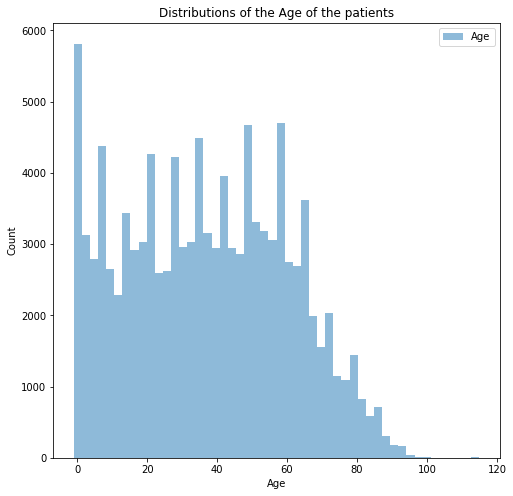

In [14]:
#use the created function to plot distribution of the Age column in the dataset
plot_column_distribution('Age')

- The above Age distribution reveals that patients below one year (infants) are the major age group in the dataset

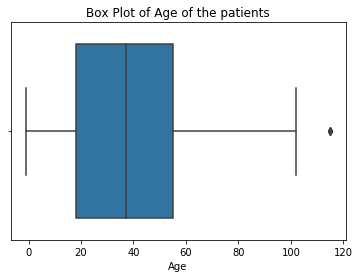

In [15]:
#Box plot of the Age column
age = df['Age']
ax = sns.boxplot(x=age)
plt.title('Box Plot of Age of the patients');
plt.show();

From the box plot of age, there seems to be an outlier that is above 110 years. We can drop that row together with the -1 year in order to clean up the `Age` column

In [16]:
# filter the age column for the two outlying figures 
age_outliers = df[(df['Age'] > 110) | (df['Age'] == -1)]
age_outliers

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
63912,3.196321e+13,5700278,F,2016-05-16 09:17:44,2016-05-19,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196321e+13,5700279,F,2016-05-16 09:17:44,2016-05-19,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196321e+13,5562812,F,2016-04-08 14:29:17,2016-05-16,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196321e+13,5744037,F,2016-05-30 09:44:51,2016-05-30,115,ANDORINHAS,0,0,0,0,1,0,No
97666,7.482346e+14,5717451,F,2016-05-19 07:57:56,2016-06-03,115,SÃO JOSÉ,0,1,0,0,0,1,No
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


In [17]:
# drop the age outliers from the datset
df.drop(age_outliers.index, inplace=True)

In [18]:
# the final datset now has 110,521 rows
df.shape

(110521, 14)

##### 3. Add `scheduled_weekday` and `appointment_weekday` column to the dataset

- We can add the day of the week when the patients had schedulled the appointment and the day of the week when they went for their appointment 

In [19]:
#create new scheduled_weekday column from the ScheduledDay column
df['scheduled_weekday'] = df['ScheduledDay'].dt.day_name()

In [20]:
# create new appointment_weekday column from AppointmentDay column
df['appointment_weekday'] = df['AppointmentDay'].dt.day_name()

In [21]:
#inspect datset to confirm creation of the new columns
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,scheduled_weekday,appointment_weekday
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,Friday
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,Friday
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,Friday
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday,Friday
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,Friday


In [22]:
# proportion of days when patients that came in for their appointments
df['appointment_weekday'].value_counts(normalize=True)*100

Wednesday    23.404602
Tuesday      23.199211
Monday       20.549941
Friday       17.207590
Thursday     15.603369
Saturday      0.035287
Name: appointment_weekday, dtype: float64

In [38]:
# define a function to plot the relationship between appointment schedule or attendance day and showing up.
def plot_appointment_weekday(weekday_type):
    sns.countplot(data=df, x=f'{weekday_type}', hue='No-show')
    plt.title(f'Relationship between {weekday_type} and showing up or not')
    plt.legend(['Yes','No'], title='No-show')
    plt.xlabel(f'{weekday_type}')
    plt.ylabel('number of patients')
    plt.show();

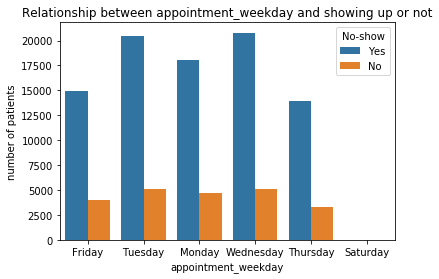

In [39]:
plot_appointment_weekday('appointment_weekday')

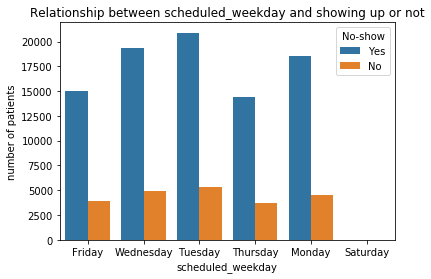

In [40]:
plot_appointment_weekday('scheduled_weekday')

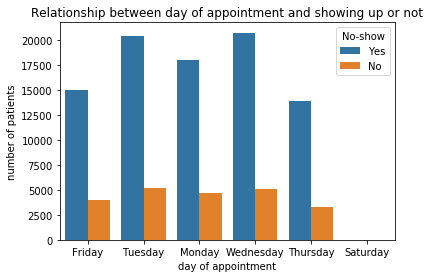

In [23]:
# plot showing the relationship between day of appointment and showing up or not 
sns.countplot(data=df, x='appointment_weekday', hue='No-show');
plt.title('Relationship between day of appointment and showing up or not')
plt.legend(['Yes','No'], title='No-show');
plt.xlabel('day of appointment')
plt.ylabel('number of patients');

- From the above analysis, it can be seen that majority of patients turned up for their appointments from Monday to Friday. Saturday was the least favoured day for appointments with Sunday having no appointments at all


In [24]:
#proportion of days of the week when appointments were scheduled
df['scheduled_weekday'].value_counts(normalize=True)*100

Tuesday      23.676948
Wednesday    21.952389
Monday       20.883814
Friday       17.113490
Thursday     16.351644
Saturday      0.021715
Name: scheduled_weekday, dtype: float64

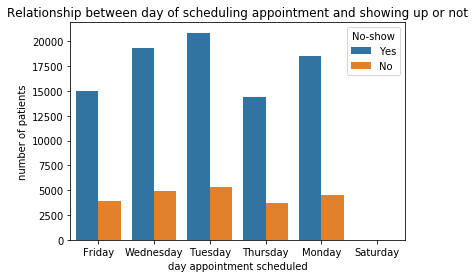

In [25]:
# plot showing relationship between day of schedulling appointment and showing up or not
sns.countplot(data=df, x='scheduled_weekday', hue='No-show');
plt.title('Relationship between day of scheduling appointment and showing up or not')
plt.legend(['Yes','No'], title='No-show');
plt.xlabel('day appointment scheduled')
plt.ylabel('number of patients');

- Analysis Of the day of scheduling appointmentsalso shows that majority of patients set their appointments during weekdays with Saturday being the least favoured day and Sunday having no appointments schedulled at all


<a id='eda'></a>
## Exploratory Data Analysis



### Does the `Age` of the patient determine whether they will show up for their appointment or not?

In [26]:
#get the min, 25%, median, 75%, and max values of the Age column
print(df['Age'].describe())

count    110521.000000
mean         37.085694
std          23.104606
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         102.000000
Name: Age, dtype: float64


In [27]:
#create bins of ages based on the min, 25%, median, 75%, and max values of the Age column
bin_edges = [ 0, 18, 37, 55, 102]

In [28]:
# create bin labels based on the age categories of the patients
bin_labels = ['children', 'young_adults', 'adults', 'elderly']

In [29]:
# create a new column with Age categories based on the Age of the patients
df['Age_category'] = pd.cut(df['Age'], bin_edges, labels=bin_labels)

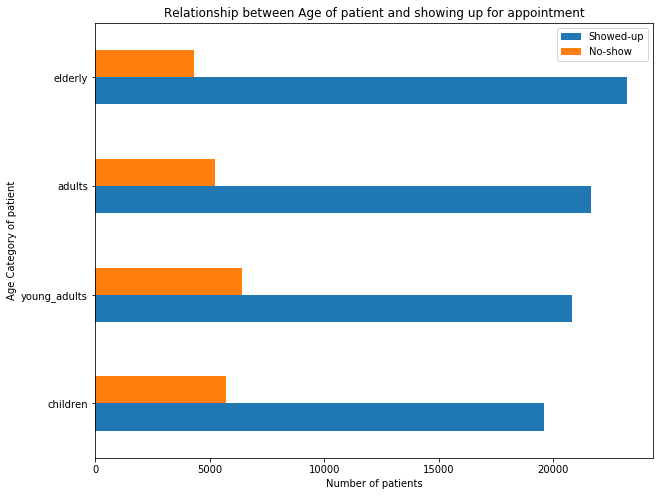

In [30]:
# create a plot showing the relationship between the Age of the patient and showing up or not for their appointment 

ax = df.groupby('Age_category')['No-show'].value_counts().unstack()
ax.plot(kind = 'barh',figsize= (10,8))

plt.title('Relationship between Age of patient and showing up for appointment')
plt.ylabel('Age Category of patient')
plt.xlabel('Number of patients')
plt.legend(['Showed-up','No-show'])
plt.show();

- Based on the above analysis, it can be observed that more elderly people showed up fro their appointment than anyother age category

- it can also be noted that the older the person, the more likely they are to shoe up for their appointment 

### Are patients whom were sent an SMS more likely to show up for their appointment than those that were not sent?

In [31]:
# percentage of patients who received sms
df['SMS_received'].value_counts(normalize=True)*100

0    67.896599
1    32.103401
Name: SMS_received, dtype: float64

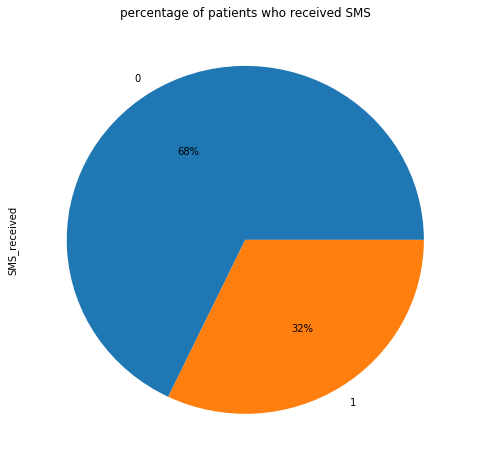

In [32]:
#plot percentages of SMS_reveived column
x = df['SMS_received'].value_counts(normalize=True)*100
x.plot(kind='pie', autopct = '%1.0f%%', figsize=(8,8))
plt.title('percentage of patients who received SMS')
plt.show();

- From the above summary 68% of patients did not receive an sms while 32% received


In [33]:
#rename the SMS_received values to Yes and No for better interpretation
df['SMS_received'] = df['SMS_received'].map({1: 'Yes', 0: 'No'})

In [34]:
# Tabulate showing up and receiving sms by use of groupby
df.groupby('SMS_received')['No-show'].value_counts().unstack()

No-show,No,Yes
SMS_received,,
No,62508,12532
Yes,25697,9784


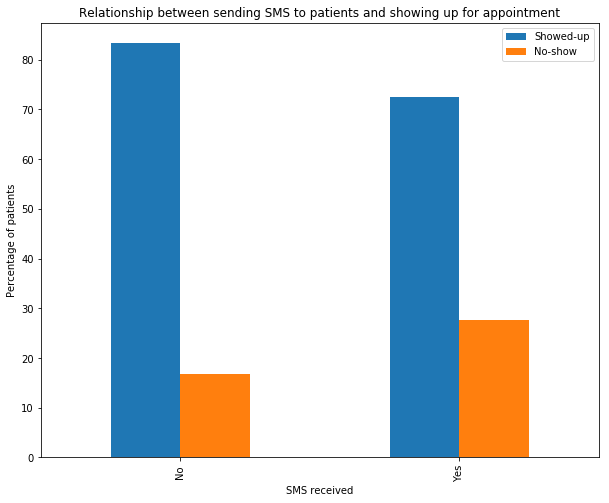

In [35]:
# create a plot showing the realtionship between receiving an sms and showing up for appointment
ax = df.groupby('SMS_received')['No-show'].value_counts(normalize=True).unstack()*100
ax.plot(kind = 'bar',figsize= (10,8))
plt.title('Relationship between sending SMS to patients and showing up for appointment')
plt.xlabel('SMS received')
plt.ylabel('Percentage of patients')
plt.legend(['Showed-up','No-show']);
plt.show();

- A larger percentage of patients showed up that had not received an SMS than those that had received. 

<a id='conclusions'></a>
## Conclusions

The following are the summaries that can be made from the analysis carried out of the dataset:

1. The Age of a patient seems to determine whether they will show up for their appointment or not. Elderly patients more likely to show up for their appointents as comapred to younger patients. 


2. Patients who were sent SMS were less likely to show up fo their appointmetn than those that were not sent an SMS. Sending SMS does not seem to have an effect on patients showing up or not.


3. Patients do not prefeer setting up or attending appointments on Saturday. It also appears that the hospitals are closed on Sunday as no appointments are schedulled or attended on this day.


- A limitation of the analysis is that the binnig of the `Age_category` column was done based on the mininum, maximum, 25th, 50th and 75th percentile values. A more robust and statistical approach would be recommended so as to provide concrete statistical conclusions.


- Further analysis on the dataset can be done to be able to determine possible predictors of not showing up for appointments. Additionally a machine learnig model can be trained on the data so as to predict whether or not a patient will show up for an appointment.


In [36]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0